In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [4]:
import plotly

plotly.offline.init_notebook_mode(connected=True)


In [5]:
import mygene
mg = mygene.MyGeneInfo()

In [6]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [7]:
d_PTVs = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
))

# d_coding = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

# d_all = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))


2018-05-22 17:49:12,470 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz


In [8]:
font = {
#     'family' : 'normal',
#     'weight' : 'bold',
    'size'   : 32
}
matplotlib.rc('font', **font)


In [9]:
phenotype = 'heart attack/myocardial infarction'
d = d_PTVs

In [10]:
print(d.get_topk_pcs_for_phe_by_label(
    phenotype, 3
))
print(d.get_kth_pc_for_phe_by_label(phenotype, 1))
print(d.get_kth_pc_for_phe_by_label(phenotype, 2))

[17 15 92]
17
15


In [11]:
biplot_phes = [
    'heart attack/myocardial infarction',
    'high cholesterol',
    'Statin',
    'Pulse rate, automated reading',
    'Forced vital capacity (FVC)',
    'Diastolic blood pressure, automated reading',
    'Monocyte count',
]


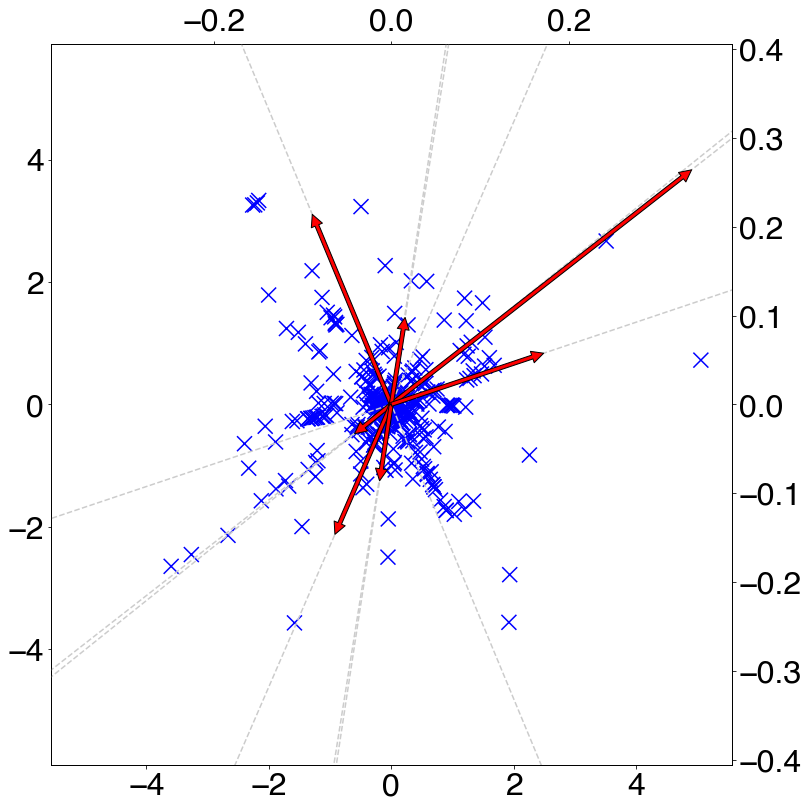

In [12]:
biplot_df = decomposition.plot_biplot(
    d, 
    pc_index1=d.get_kth_pc_for_phe_by_label(phenotype, 1), 
    pc_index2=d.get_kth_pc_for_phe_by_label(phenotype, 2), 
    biplot_phes=biplot_phes, 
    arrow_max_scale=1.2,    
    figsize=(12,12), 
    save=os.path.join(out_dir, 'Biplot_PTVs_PC{}xPC{}'.format(
        d.get_kth_pc_for_phe_by_label(phenotype, 1) + 1,
        d.get_kth_pc_for_phe_by_label(phenotype, 2) + 1,        
    ))
)

In [13]:
biplot_df

,phe,x,y,r,slope
3,"Pulse rate, automated reading",-0.088930,0.213905,0.231655,-2.405327
6,Monocyte count,0.171595,0.057579,0.180998,0.335550
4,Forced vital capacity (FVC),0.338161,0.264066,0.429050,0.780888
0,heart attack/myocardial infarction,-0.041328,-0.033117,0.052960,0.801301
1,high cholesterol,-0.063451,-0.146396,0.159555,2.307218
5,"Diastolic blood pressure, automated reading",0.015594,0.097844,0.099079,6.274369
2,Statin,-0.013116,-0.086071,0.087065,6.562055


In [14]:
variant_df = pd.read_csv(
    os.path.join(repo_dir, 'private_data', 'variant_and_gene_labels.tsv.gz'), 
    sep='\t', compression='gzip',
)
var2gene_dict = dict(zip(variant_df['label_var'], variant_df['label_gene']))


In [15]:
plotly.offline.iplot(decomposition.plotly_eigen_phe(
    d, 
    d.get_kth_pc_for_phe_by_label(phenotype, 1), 
    d.get_kth_pc_for_phe_by_label(phenotype, 2),
))



In [16]:
plotly.offline.iplot(decomposition.plotly_factor_var(
    d, 
    d.get_kth_pc_for_phe_by_label(phenotype, 1), 
    d.get_kth_pc_for_phe_by_label(phenotype, 2),
    var2gene_dict,
    90,
))



querying 1-2...done.
Finished.
querying 1-2...done.
Finished.
querying 1-2...done.
Finished.


In [ ]:
mg.querymany(
    [
        'ENSG00000267282', 'ENSG00000130202',
        'ENSG00000241388', 'ENSG00000135100',
    ], 
    scopes='ensembl.gene',
    fields='symbol', 
    species='human', 
    as_dataframe=True,
    df_index=False,
)